# Fashion MNIST

The researchers introduced Fashion-MNIST as a drop in replacement for MNIST dataset. The new dataset contains images of various clothing items - such as shirts, shoes, coats and other fashion items.


## Importing of Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn
from mlxtend.evaluate import confusion_matrix
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import TensorBoard
from keras.constraints import maxnorm
import sys
from time import time
K.set_image_dim_ordering('th')
%matplotlib inline
import keras

Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring of the Data

#### Let's explore the format of the dataset before training the model

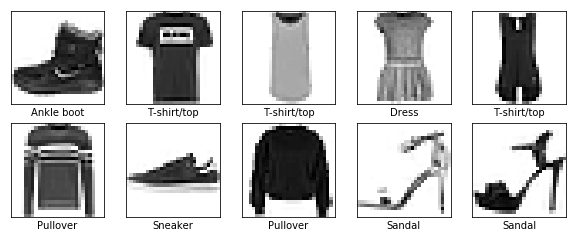

In [5]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])

In [6]:
train_data.shape

(60000, 28, 28)

In [7]:
train_label.shape

(60000,)

In [8]:
test_data.shape

(10000, 28, 28)

In [9]:
test_label.shape

(10000,)

## Preprocess the data

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
train_label = labelencoder.fit_transform(train_label)
test_label = labelencoder.fit_transform(test_label)
onehotencoder = OneHotEncoder()
train_label=train_label.reshape(-1, 1)
train_label = onehotencoder.fit_transform(train_label).toarray()
test_label=test_label.reshape(-1, 1)
test_label = onehotencoder.fit_transform(test_label).toarray()
train_label.shape

(60000, 10)

In [11]:
test_label.shape

(10000, 10)

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

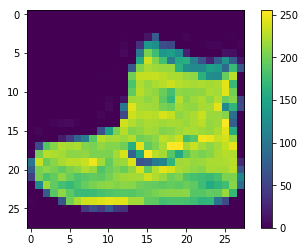

In [12]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()


We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, cast the datatype of the image components from an integer to a float, and divide by 255.

This is also known as flatterning

In [13]:
train_data = train_data.reshape([-1, 28, 28, 1])
test_data = test_data.reshape([-1, 28, 28, 1])
train_data = train_data/255.0
test_data = test_data/255.0
tensorboard = TensorBoard(log_dir="logs/cnn".format(time()))

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [14]:
def CNN_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    
    model.add(Conv2D(64, (5, 5), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
        
    model.add(Conv2D(128, (1, 1), padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
        
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    return model

In [15]:
model=CNN_model()
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Model

Training the neural network model requires the following steps:

Feed the training data to the model.

The model learns to associate images and labels.

To start training, call the model.fit method—the model is "fit" to the training data:

In [16]:
history=model.fit(train_data, train_label, validation_split=0.10, batch_size=64, epochs=25, verbose=2,callbacks=[tensorboard])

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
 - 119s - loss: 0.6079 - acc: 0.7721 - val_loss: 0.4187 - val_acc: 0.8433
Epoch 2/25
 - 130s - loss: 0.3867 - acc: 0.8589 - val_loss: 0.3454 - val_acc: 0.8763
Epoch 3/25
 - 125s - loss: 0.3408 - acc: 0.8763 - val_loss: 0.3141 - val_acc: 0.8822
Epoch 4/25
 - 130s - loss: 0.3185 - acc: 0.8842 - val_loss: 0.3500 - val_acc: 0.8750
Epoch 5/25
 - 123s - loss: 0.3009 - acc: 0.8913 - val_loss: 0.3058 - val_acc: 0.8873
Epoch 6/25
 - 126s - loss: 0.2864 - acc: 0.8958 - val_loss: 0.3053 - val_acc: 0.8847
Epoch 7/25
 - 110s - loss: 0.2728 - acc: 0.8989 - val_loss: 0.3156 - val_acc: 0.8885
Epoch 8/25
 - 98s - loss: 0.2666 - acc: 0.9034 - val_loss: 0.3146 - val_acc: 0.8857
Epoch 9/25
 - 104s - loss: 0.2555 - acc: 0.9045 - val_loss: 0.2908 - val_acc: 0.8945
Epoch 10/25
 - 102s - loss: 0.2454 - acc: 0.9089 - val_loss: 0.2971 - val_acc: 0.8938
Epoch 11/25
 - 96s - loss: 0.2370 - acc: 0.9114 - val_loss: 0.2871 - val_acc: 0.8957
Epoch 12/25
 - 1

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.94 (or 94%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
scores=model.evaluate(test_data,test_label,verbose=0)
print("CNN Accurancy: %.2f%%" % (scores[1]*100))


CNN Accurancy: 89.87%


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 28, 1)         22432     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 14, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 14, 1)         51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 7, 1)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 7, 1)         8320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 4, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


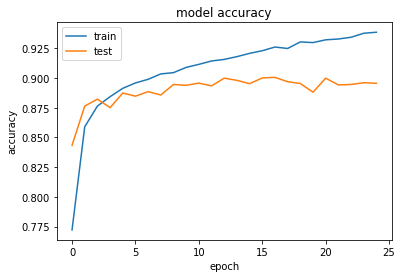

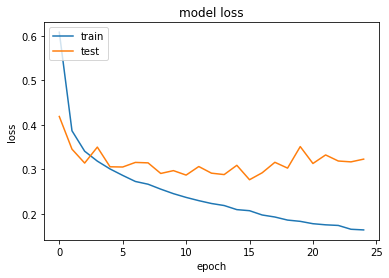

In [19]:
from matplotlib import pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
predictions = model.predict(test_data)

In [21]:
test_label.shape

(10000, 10)

In [22]:
cm = confusion_matrix(np.argmax(test_label, axis=1),
...                    np.argmax(predictions, axis=1))

[[915   1  11  22   0   1  41   0   9   0]
 [  1 981   0  10   3   0   5   0   0   0]
 [ 24   0 876  10  61   0  28   0   1   0]
 [ 13   4  11 932  25   1  11   0   3   0]
 [  1   0  86  43 835   0  33   0   2   0]
 [  0   0   0   0   0 971   0  15   2  12]
 [203   4 103  33  74   0 574   0   9   0]
 [  0   0   0   0   0  13   0 963   0  24]
 [  6   0   4   3   3   4   2   5 973   0]
 [  1   0   0   0   0   6   0  26   0 967]]


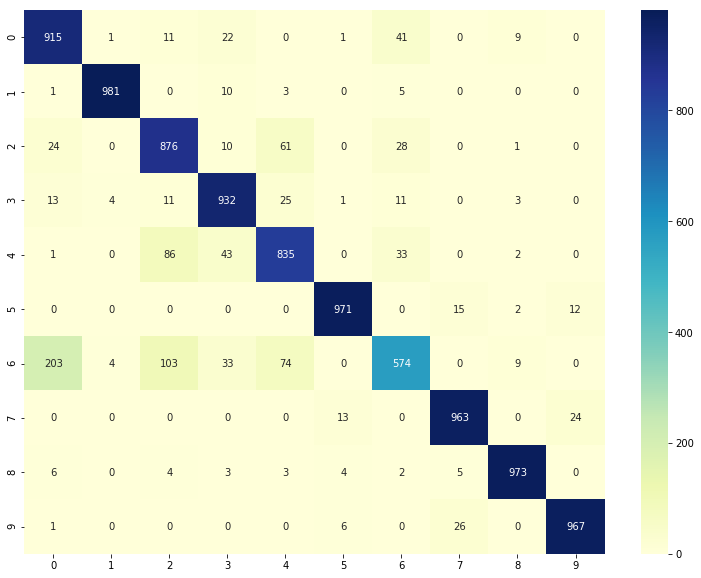

In [23]:
print(cm)
arr = np.array(cm)
df = pd.DataFrame(arr, index=[i for i in "0123456789"],columns=[i for i in "0123456789"])
plt.figure(figsize=(13, 10))
seaborn.heatmap(df, annot=True, cmap="YlGnBu", fmt='d')
plt.show()